In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# --- Load & prep ---
df = pd.read_csv('usd_exchange_rates.csv')
df['date'] = pd.to_datetime(df['TIME_PERIOD'])
df['value'] = df['OBS_VALUE'].astype(float)
df = df.sort_values('date').reset_index(drop=True)

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
df.head()

In [7]:
# --- Split ---
split = int(len(df)*0.8)
train, test = df.iloc[:split], df.iloc[split:]

# --- Auto ARIMA with intercept ---
stepwise = auto_arima(
    train['value'],
    seasonal=False,
    with_intercept=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
order = stepwise.order
print("Order + intercept →", order)

C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-37475.543, Time=4.40 sec


C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-37483.547, Time=1.04 sec


C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-37481.630, Time=0.60 sec


C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-37481.631, Time=1.02 sec


C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-37485.537, Time=0.50 sec


C:\Users\alius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-37479.366, Time=1.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 9.045 seconds
Order + intercept → (0, 1, 0)


In [8]:
# --- Fit ARIMA(2,1,2)+drift ---
model = ARIMA(train['value'], order=order, trend='t')
fit   = model.fit()

# --- Dynamic forecast & CI ---
pred   = fit.get_forecast(steps=len(test))
forecast = pred.predicted_mean
ci       = pred.conf_int()

# --- Metrics ---
mse  = mean_squared_error(test['value'], forecast)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(test['value'], forecast)
mape = np.mean(np.abs((test['value']-forecast)/test['value']))*100
print(f"MSE:{mse:.4f} RMSE:{rmse:.4f} MAE:{mae:.4f} MAPE:{mape:.2f}%")

MSE:0.0031 RMSE:0.0558 MAE:0.0458 MAPE:4.16%


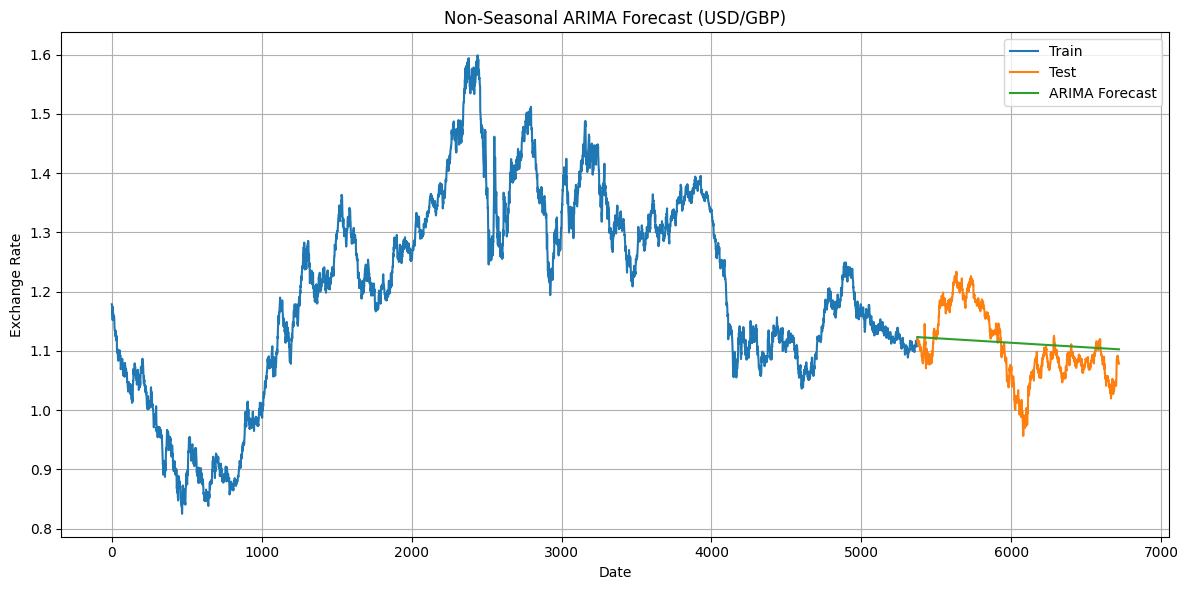

In [9]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.title('Non-Seasonal ARIMA Forecast (EUR/USD)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

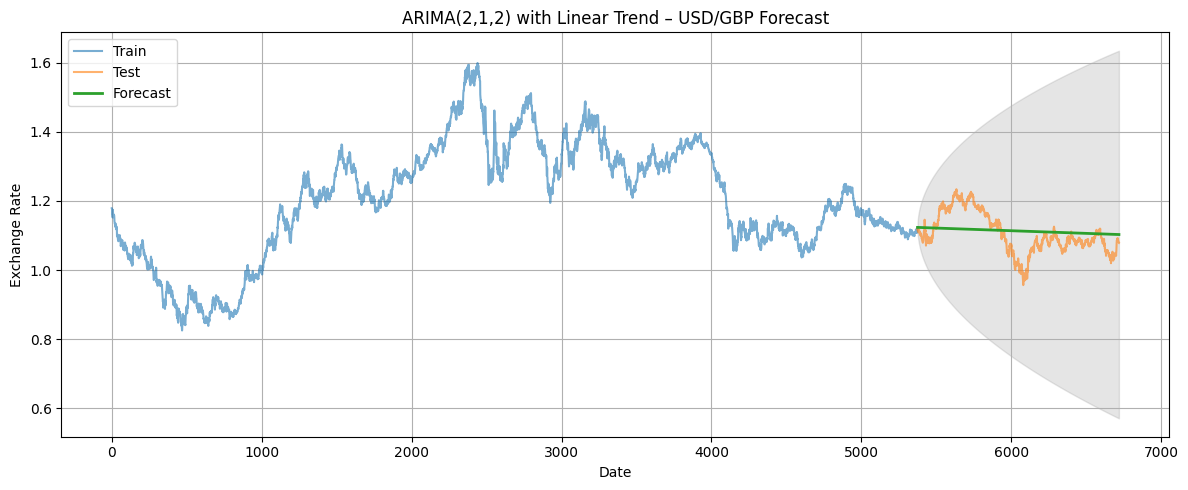

In [10]:
# 4. Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(train.index, train['value'], label='Train', alpha=0.6)
plt.plot(test.index,  test['value'],  label='Test',  alpha=0.6)
plt.plot(test.index,  forecast,       label='Forecast', lw=2)
plt.fill_between(test.index, ci.iloc[:,0], ci.iloc[:,1], color='gray', alpha=0.2)
plt.title("ARIMA(2,1,2) with Linear Trend – USD/GBP Forecast")
plt.xlabel("Date"); plt.ylabel("Exchange Rate")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

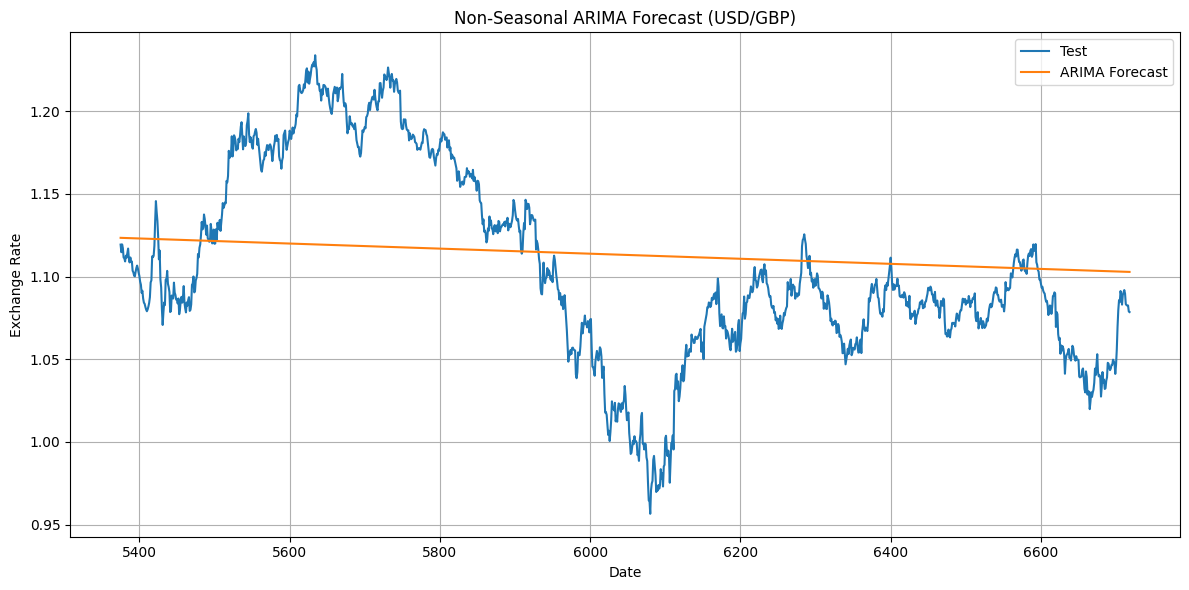

In [11]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.title('Non-Seasonal ARIMA Forecast (USD/GBP)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Save forecast and actuals to CSV
forecast_df = pd.DataFrame({
    'date': test.index,
    'actual': test['value'].values,
    'forecast': forecast.values,
    'ci_lower': ci.iloc[:,0].values,
    'ci_upper': ci.iloc[:,1].values
})

forecast_df.to_csv('arima_forecast_output.csv', index=False)
print("Forecast data saved to 'arima_forecast_output.csv'")


Forecast data saved to 'arima_forecast_output.csv'
